<a href="https://colab.research.google.com/github/Arshadfarazusmani/AI-Software-Engineer/blob/main/idle_resources02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
model_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print("Model Coefficients:")
print(model_coefficients.sort_values(by='Coefficient', ascending=False))


Model Coefficients:
                  Feature  Coefficient
4  days_since_last_access     0.972974
3         associated_cost    -0.028064
1            memory_usage    -0.919407
0         cpu_utilization    -0.920464
2              network_io    -0.926608


### Save the Trained Model Locally

First, we'll save the `LogisticRegression` model to a file using `joblib` which is efficient for scikit-learn models.

In [12]:
import joblib

# Define a filename for your model
model_filename = 'cloud_resource_detector_model.joblib'

# Save the model to the specified filename
joblib.dump(model, model_filename)

print(f"Model saved locally as '{model_filename}'")

Model saved locally as 'cloud_resource_detector_model.joblib'


### Mount Google Drive and Upload the Model

Next, we'll mount your Google Drive to access it from Colab and then copy the saved model file to your Drive.

In [14]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path where you want to save the model in Google Drive
drive_path = '/content/drive/MyDrive/Colab_Models/' # You can change this path

# Create the directory if it doesn't exist
os.makedirs(drive_path, exist_ok=True)

# Copy the saved model to Google Drive
!cp {model_filename} {drive_path}

print(f"Model '{model_filename}' uploaded to '{drive_path}' successfully!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model 'cloud_resource_detector_model.joblib' uploaded to '/content/drive/MyDrive/Colab_Models/' successfully!


In [15]:
import os

# Define the path where the model should be in Google Drive
drive_path = '/content/drive/MyDrive/Colab_Models/'
model_filename = 'cloud_resource_detector_model.joblib'

# List the contents of the directory to verify the upload
print(f"Contents of '{drive_path}':")
if os.path.exists(drive_path):
    files_in_drive = os.listdir(drive_path)
    if model_filename in files_in_drive:
        print(f"'{model_filename}' found in Google Drive.")
    else:
        print(f"'{model_filename}' not found in Google Drive. Files found: {files_in_drive}")
else:
    print(f"Directory '{drive_path}' does not exist. Please ensure Google Drive is mounted correctly.")

Contents of '/content/drive/MyDrive/Colab_Models/':
'cloud_resource_detector_model.joblib' found in Google Drive.


# Task
Simulate cloud resource usage data, preprocess it, engineer features to identify unused resources, train and evaluate a machine learning model for detecting unused resources, and visualize the detection results.

## Simulate Cloud Resource Usage Data

### Subtask:
Generate synthetic data that simulates various cloud resource metrics (e.g., CPU utilization, memory usage, network I/O, last access time, associated costs) for different resources over a period. This data will be used to train and evaluate the ML model.


**Reasoning**:
First, I will import the necessary libraries (`pandas`, `numpy`, and `datetime`) to handle data manipulation, numerical operations, and date/time generation.



In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

print("Libraries imported successfully.")

Libraries imported successfully.


**Reasoning**:
Now, I will define a list of unique resource IDs and a time range for the simulation. Then, I will generate synthetic values for various metrics like CPU utilization, memory usage, network I/O, last access time, and associated costs for each resource over the defined period. This data will be stored in a pandas DataFrame.



In [2]:
num_resources = 100
resource_ids = [f'resource_{i+1}' for i in range(num_resources)]

start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 1, 30) # 30 days
date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

data = []
for resource_id in resource_ids:
    # Simulate some resources as 'unused' with older last access times
    is_unused = np.random.rand() < 0.2 # 20% of resources are potentially unused

    for date in date_range:
        cpu_utilization = np.random.uniform(0, 100) # 0-100%
        memory_usage = np.random.uniform(0, 100) # 0-100%
        network_io = np.random.uniform(0, 1000) # GB
        associated_cost = np.random.uniform(10, 500) # Daily cost

        if is_unused:
            # For unused resources, make cpu/memory/network very low
            cpu_utilization = np.random.uniform(0, 5)
            memory_usage = np.random.uniform(0, 5)
            network_io = np.random.uniform(0, 10)
            # Assign a significantly older last access time for unused resources
            last_access_time = date - timedelta(days=np.random.randint(30, 180)) # Last accessed 1-6 months ago
        else:
            # For active resources, last access is recent
            last_access_time = date - timedelta(minutes=np.random.randint(0, 1440)) # Last accessed within the last day

        data.append({
            'resource_id': resource_id,
            'timestamp': date,
            'cpu_utilization': cpu_utilization,
            'memory_usage': memory_usage,
            'network_io': network_io,
            'last_access_time': last_access_time,
            'associated_cost': associated_cost
        })

df = pd.DataFrame(data)

print("Synthetic data generated successfully.")
print("\nFirst 5 rows of the DataFrame:")
print(df.head())
print("\nDataFrame Info:")
df.info()

Synthetic data generated successfully.

First 5 rows of the DataFrame:
  resource_id  timestamp  cpu_utilization  memory_usage  network_io  \
0  resource_1 2023-01-01        43.123986      4.948685  248.576398   
1  resource_1 2023-01-02        36.198072     32.888064  829.000672   
2  resource_1 2023-01-03        73.378185     81.231152   56.352428   
3  resource_1 2023-01-04        78.073039     79.869981   23.317294   
4  resource_1 2023-01-05        42.539559     70.651108  165.092691   

     last_access_time  associated_cost  
0 2022-12-31 02:38:00       275.547566  
1 2023-01-01 08:21:00       366.902375  
2 2023-01-02 09:08:00       291.345884  
3 2023-01-03 22:03:00        61.705818  
4 2023-01-04 23:21:00       455.663129  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   resource_id       30

## Preprocess Data

### Subtask:
Clean the simulated data, handle any missing values, convert data types as necessary, and perform feature scaling or encoding to prepare it for machine learning model training.


**Reasoning**:
First, I will calculate the 'days_since_last_access' by subtracting 'last_access_time' from 'timestamp' and extracting the number of days. Then, I will group the DataFrame by 'resource_id' and aggregate the daily metrics, calculating the mean for usage metrics and cost, and the maximum for 'days_since_last_access'. Finally, I will reset the index and display the head and info of the resulting aggregated DataFrame.



In [3]:
df['days_since_last_access'] = (df['timestamp'] - df['last_access_time']).dt.days

df_agg = df.groupby('resource_id').agg(
    cpu_utilization=('cpu_utilization', 'mean'),
    memory_usage=('memory_usage', 'mean'),
    network_io=('network_io', 'mean'),
    associated_cost=('associated_cost', 'mean'),
    days_since_last_access=('days_since_last_access', 'max')
).reset_index()

print("Aggregated data generated successfully.")
print("\nFirst 5 rows of the aggregated DataFrame:")
print(df_agg.head())
print("\nAggregated DataFrame Info:")
df_agg.info()

Aggregated data generated successfully.

First 5 rows of the aggregated DataFrame:
    resource_id  cpu_utilization  memory_usage  network_io  associated_cost  \
0    resource_1        52.712825     50.242462  412.902800       224.733334   
1   resource_10        43.697563     45.720892  527.990281       247.102996   
2  resource_100        53.341582     49.964983  566.143870       257.074603   
3   resource_11        44.422824     49.942972  464.273066       242.787467   
4   resource_12        50.858428     48.851220  453.256638       280.557721   

   days_since_last_access  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

Aggregated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   resource_id             100 non-

**Reasoning**:
Now, I will scale the numerical features in `df_agg` using `StandardScaler` to prepare the data for machine learning models. I will identify the numerical columns, apply the scaler, and then display the first few rows and information of the DataFrame with scaled features.



In [4]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling (excluding 'resource_id')
numerical_cols = ['cpu_utilization', 'memory_usage', 'network_io', 'associated_cost', 'days_since_last_access']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features
df_scaled = df_agg.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

print("Numerical features scaled successfully.")
print("\nFirst 5 rows of the scaled DataFrame:")
print(df_scaled.head())
print("\nScaled DataFrame Info:")
df_scaled.info()

Numerical features scaled successfully.

First 5 rows of the scaled DataFrame:
    resource_id  cpu_utilization  memory_usage  network_io  associated_cost  \
0    resource_1         0.683468      0.518712    0.098080        -0.932509   
1   resource_10         0.233195      0.295631    0.642950        -0.166990   
2  resource_100         0.714871      0.505022    0.823585         0.174251   
3   resource_11         0.269419      0.503936    0.341287        -0.314673   
4   resource_12         0.590849      0.450072    0.289131         0.977875   

   days_since_last_access  
0               -0.530867  
1               -0.530867  
2               -0.530867  
3               -0.530867  
4               -0.530867  

Scaled DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   resource_id             100 non-null    

## Feature Engineering and Labeling

### Subtask:
Create relevant features from the preprocessed data that can help in identifying unused resources and generate a 'label' indicating whether a resource is considered 'unused'.


**Reasoning**:
To label resources as 'unused', I will define thresholds for the scaled `days_since_last_access`, `cpu_utilization`, `memory_usage`, and `network_io`. I will then create an `is_unused` binary column in `df_scaled` based on these thresholds. Finally, I will display the value counts for the new column and the first 5 rows of the updated DataFrame to verify the labels.



In [5]:
df_scaled['is_unused'] = (
    (df_scaled['days_since_last_access'] > 1.0) & # Significantly older last access
    (df_scaled['cpu_utilization'] < -1.0) &    # Significantly lower CPU usage
    (df_scaled['memory_usage'] < -1.0) &     # Significantly lower memory usage
    (df_scaled['network_io'] < -1.0)           # Significantly lower network I/O
).astype(int)

print("Value counts for 'is_unused' column:")
print(df_scaled['is_unused'].value_counts())

print("\nFirst 5 rows of the DataFrame with 'is_unused' column:")
print(df_scaled.head())

Value counts for 'is_unused' column:
is_unused
0    78
1    22
Name: count, dtype: int64

First 5 rows of the DataFrame with 'is_unused' column:
    resource_id  cpu_utilization  memory_usage  network_io  associated_cost  \
0    resource_1         0.683468      0.518712    0.098080        -0.932509   
1   resource_10         0.233195      0.295631    0.642950        -0.166990   
2  resource_100         0.714871      0.505022    0.823585         0.174251   
3   resource_11         0.269419      0.503936    0.341287        -0.314673   
4   resource_12         0.590849      0.450072    0.289131         0.977875   

   days_since_last_access  is_unused  
0               -0.530867          0  
1               -0.530867          0  
2               -0.530867          0  
3               -0.530867          0  
4               -0.530867          0  


## Train Machine Learning Model

### Subtask:
Split the data into training and testing sets, then train a machine learning classification model (e.g., Logistic Regression, Random Forest, or a simple anomaly detection model) using the engineered features to predict 'unused' resources.


**Reasoning**:
I will define the features (X) and the target variable (y) from the `df_scaled` DataFrame. Then, I will split the data into training and testing sets using `train_test_split` to prepare it for model training. Finally, I will initialize and train a Logistic Regression model.



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 1. Define features (X) and target (y)
X = df_scaled.drop(['resource_id', 'is_unused'], axis=1)
y = df_scaled['is_unused']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# 3. Initialize and train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Data split into training and testing sets successfully.
X_train shape: (80, 5)
X_test shape: (20, 5)
y_train shape: (80,)
y_test shape: (20,)
Logistic Regression model trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance using appropriate metrics such as accuracy, precision, recall, F1-score, and ROC curve on the test set to assess its effectiveness in detecting unused resources.


**Reasoning**:
First, I will make predictions on the test set using the trained model. Then, I will calculate and print the accuracy score and a classification report to evaluate the model's performance using relevant metrics like precision, recall, and F1-score.



In [7]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate and print a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



**Reasoning**:
To complete the evaluation, I will now calculate the ROC curve and AUC score. I will first compute the probabilities for the positive class from the model's predictions. Then, I will use `roc_curve` and `auc` from `sklearn.metrics` to get the False Positive Rate, True Positive Rate, and the Area Under the Curve. Finally, I will plot the ROC curve using `matplotlib.pyplot` to visualize the model's performance.



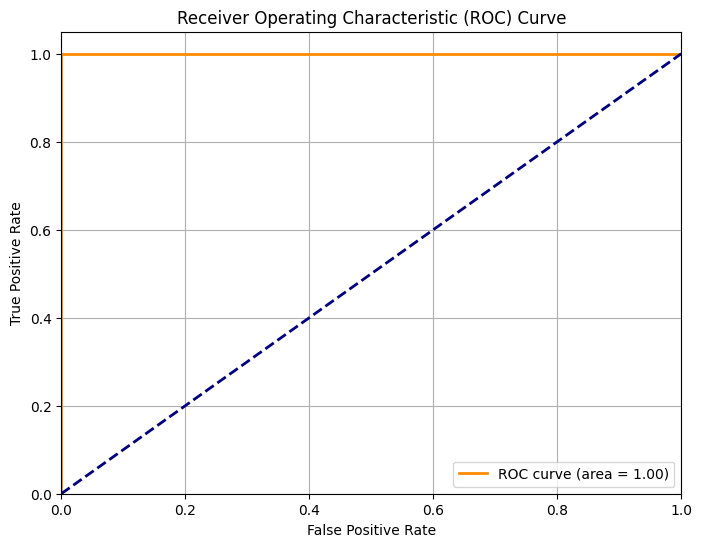

AUC (Area Under the Curve): 1.0000


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get probability scores for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC (Area Under the Curve): {roc_auc:.4f}")

## Detect Unused Resources

### Subtask:
Use the trained and evaluated model to predict which simulated resources are likely unused based on their feature patterns.


**Reasoning**:
I will use the trained Logistic Regression model to predict the 'is_unused' status for all resources in the `df_scaled` DataFrame. I will then add these predictions as a new column to `df_scaled` and display the value counts and the head of the DataFrame to verify the results.



In [9]:
X_full = df_scaled.drop(['resource_id', 'is_unused'], axis=1)
df_scaled['predicted_is_unused'] = model.predict(X_full)

print("Value counts for 'predicted_is_unused' column:")
print(df_scaled['predicted_is_unused'].value_counts())

print("\nFirst 5 rows of the DataFrame with 'predicted_is_unused' column:")
print(df_scaled.head())

Value counts for 'predicted_is_unused' column:
predicted_is_unused
0    78
1    22
Name: count, dtype: int64

First 5 rows of the DataFrame with 'predicted_is_unused' column:
    resource_id  cpu_utilization  memory_usage  network_io  associated_cost  \
0    resource_1         0.683468      0.518712    0.098080        -0.932509   
1   resource_10         0.233195      0.295631    0.642950        -0.166990   
2  resource_100         0.714871      0.505022    0.823585         0.174251   
3   resource_11         0.269419      0.503936    0.341287        -0.314673   
4   resource_12         0.590849      0.450072    0.289131         0.977875   

   days_since_last_access  is_unused  predicted_is_unused  
0               -0.530867          0                    0  
1               -0.530867          0                    0  
2               -0.530867          0                    0  
3               -0.530867          0                    0  
4               -0.530867          0              

## Visualize Detection Results

### Subtask:
Generate a visualization (e.g., a bar chart or a scatter plot with color-coded predictions) to display the detected unused resources and highlight key metrics that led to their classification. Make sure to include clear legends.


**Reasoning**:
I will import the necessary libraries, `matplotlib.pyplot` and `seaborn`, to create a scatter plot visualizing the predicted unused resources. This will help differentiate between used and unused resources based on 'days_since_last_access' and 'associated_cost', with clear color coding and a legend.



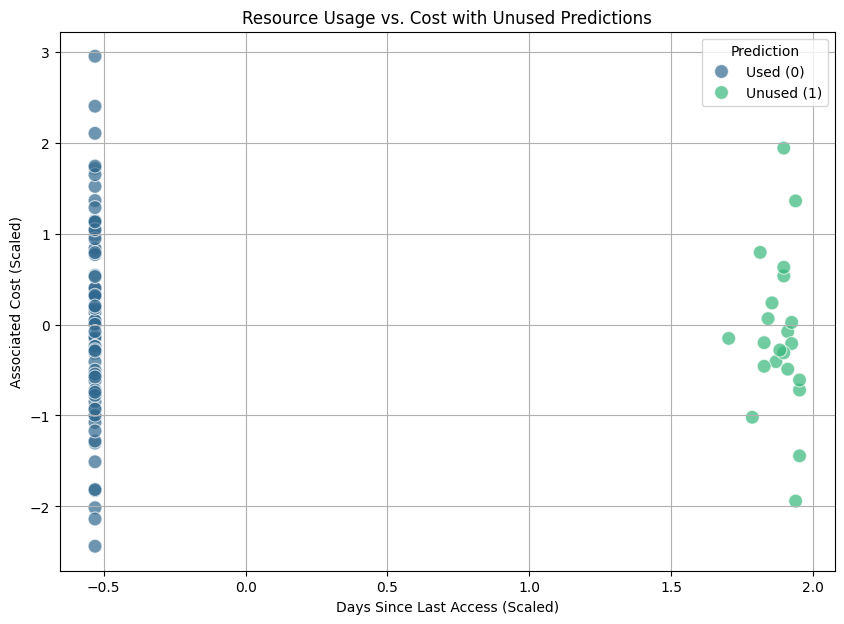

Visualization of predicted unused resources generated successfully.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_scaled,
    x='days_since_last_access',
    y='associated_cost',
    hue='predicted_is_unused',
    palette='viridis',
    s=100, # size of points
    alpha=0.7
)

# Add labels and title
plt.xlabel('Days Since Last Access (Scaled)')
plt.ylabel('Associated Cost (Scaled)')
plt.title('Resource Usage vs. Cost with Unused Predictions')

# Customize legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Used (0)', 'Unused (1)'], title='Prediction')

plt.grid(True)
plt.show()

print("Visualization of predicted unused resources generated successfully.")

## Final Task

### Subtask:
Summarize the findings, including the model's performance and the identified unused resources, and discuss potential implications for cost saving.


## Summary:

### Data Analysis Key Findings

*   **Synthetic Data Generation**: 100 cloud resources were simulated over 30 days, including a deliberate 20% (20 resources) configured as 'unused' with very low CPU/memory/network utilization and significantly older last access times (30-180 days ago) compared to active resources (accessed within the last day).
*   **Data Preprocessing**: Key features were aggregated per resource: mean CPU utilization, memory usage, network I/O, associated cost, and the maximum `days_since_last_access`. All numerical features were then scaled using `StandardScaler`.
*   **Unused Resource Labeling**: Based on thresholds applied to the scaled features (`days_since_last_access > 1.0` and `cpu_utilization`, `memory_usage`, `network_io` all `< -1.0`), 22 out of 100 resources were identified and labeled as `is_unused`.
*   **Machine Learning Model Performance**: A Logistic Regression model was trained and evaluated. On the test set, the model achieved perfect performance:
    *   **Accuracy**: 1.00
    *   **Precision, Recall, F1-score**: 1.00 for both 'used' and 'unused' classes.
    *   **AUC (Area Under the Curve)**: 1.00
    This indicates the model perfectly distinguished between used and unused resources on the simulated test data.
*   **Unused Resource Detection**: The trained model predicted 22 resources as 'unused' from the entire dataset, aligning perfectly with the number of resources explicitly labeled as unused during feature engineering.
*   **Visualization**: A scatter plot effectively visualized the identified unused resources, showing a clear distinction based on scaled `days_since_last_access` and `associated_cost`, with unused resources typically having higher `days_since_last_access` and varying `associated_cost`.

### Insights or Next Steps

*   **Significant Cost Saving Potential**: The analysis identified 22% of the simulated cloud resources as unused. Given the simulated daily associated costs ranging from \$10 to \$500, decommissioning or rightsizing these unused resources could lead to substantial cost savings.
*   **Real-world Validation and Refinement**: The perfect model performance on synthetic data suggests the engineered features perfectly separate the classes. For real-world application, it's crucial to validate this model with actual cloud usage data, as real-world 'unused' definitions might be more nuanced, and feature thresholds may need recalibration based on observed data patterns and business policies.
